In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#loading training data
train_data = './fashion_mnist/fashion-mnist_train.csv'
train_data = np.loadtxt(train_data,delimiter=',',skiprows=1)

#loading testing data
test_data = './fashion_mnist/fashion-mnist_test.csv'
test_data = np.loadtxt(test_data,delimiter=',',skiprows=1)

In [10]:
train_data.max()

255.0

In [11]:
image_train = train_data[:,1:].reshape((train_data.shape[0], 28,28))
image_label = train_data[:,0]

X_train = train_data[:,1:].astype('float') / train_data.max()
y_train = train_data[:,0]

X_test = test_data[:,1:].astype('float') / train_data.max()
y_test = test_data[:,0]

label_dic={"T-shirt/top":0,"Trouser":1,"Pullover":2,"Dress":3,"Coat":4,"Sandal":5,"Shirt":6,"Sneaker":7,"Bag":8,"Ankle boot":9}

#label meanings
#0 T-shirt/top
#1 Trouser
#2 Pullover
#3 Dress
#4 Coat
#5 Sandal
#6 Shirt
#7 Sneaker
#8 Bag
#9 Ankle boot

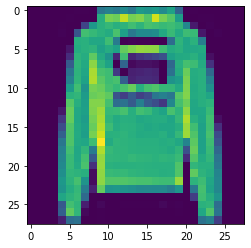

In [140]:
plt.imshow(image_train[10000,:,:])

In [141]:
image_label[100]

8.0

In [43]:
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression(max_iter=500)
log_regr.fit(X_train,y_train)

/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [44]:
print('accuracy:',log_regr.score(X_test,y_test))

y_pred=log_regr.predict(X_test)

from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test, y_pred)

accuracy: 0.8542


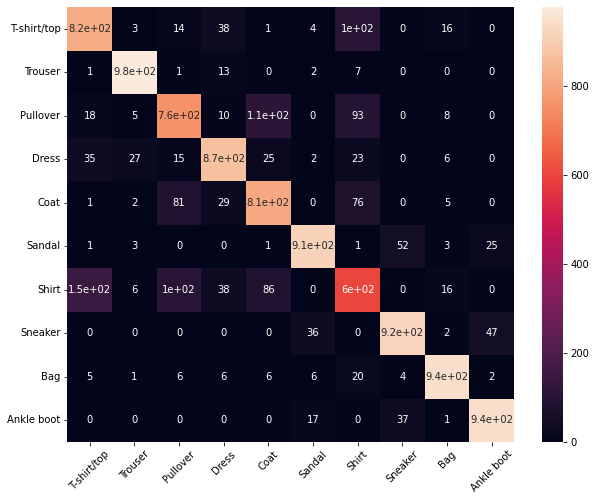

In [45]:
import seaborn as sn
fig,ax=plt.subplots(figsize=(10,8))
sn.heatmap(confusion_matrix, annot=True)

ax.xaxis.set_ticklabels(label_dic.keys()); ax.yaxis.set_ticklabels(label_dic.keys());
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)

plt.show()

In [28]:
log_regr.coef_.shape

(10, 784)

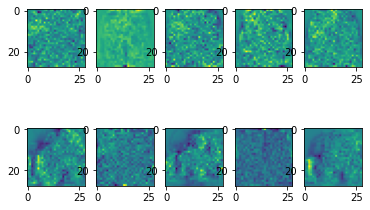

In [29]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(log_regr.coef_[i,:].reshape((28,28)))

In [51]:
crange = np.power(10, np.arange(-7.0, 2, 1))

fits_l1 = []
for c in crange:
    print(c)
    fits_l1.append(LogisticRegression(C=c, max_iter=50, penalty="l1", solver="liblinear").fit(X_train, y_train))

1e-07
1e-06
1e-05
0.0001
0.001
0.01
0.1
1.0
10.0


In [50]:
crange = np.power(10, np.arange(-7.0, 2, 1))
fits = []
for c in crange:
    print(c)
    fits.append(LogisticRegression(C=c, max_iter=50).fit(X_train, y_train))

1e-07
1e-06
1e-05


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.0001


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.001


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.01


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.1


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10.0


/Users/logange/miniforge3/envs/tensorflow_silicon/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Regularization parameter c')

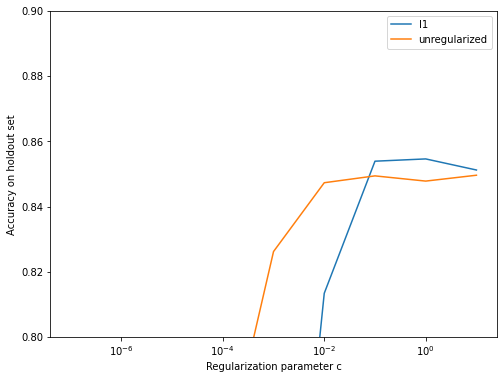

In [52]:
accuracy_l1 = [f.score(X_test, y_test) for f in fits_l1]
accuracy = [f.score(X_test, y_test) for f in fits]
plt.subplots(figsize=(8,6))
plt.plot(crange, accuracy_l1, label="l1")
plt.plot(crange, accuracy, label="unregularized")
plt.ylim((0.8, 0.9))
plt.semilogx()
plt.legend()
plt.ylabel("Accuracy on holdout set")
plt.xlabel("Regularization parameter c")

In [73]:
from sklearn.model_selection import cross_val_score

accuracy_cv = [cross_val_score(f, X_test, y_test) for f in fits_l1]

KeyboardInterrupt: 

In [40]:
accuracy_cv

[array([0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.1, 0.1, 0.1, 0.1, 0.1]),
 array([0.7065, 0.721 , 0.704 , 0.6945, 0.695 ]),
 array([0.8215, 0.8145, 0.823 , 0.82  , 0.819 ]),
 array([0.839 , 0.8315, 0.839 , 0.827 , 0.842 ]),
 array([0.8045, 0.8035, 0.806 , 0.7925, 0.8085])]

[]

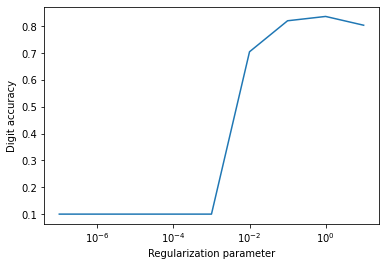

In [41]:
plt.plot(crange, np.array(accuracy_cv).mean(axis=1), label="Cross-validated")

plt.xlabel("Regularization parameter")
plt.ylabel("Digit accuracy")
plt.semilogx()

In [12]:
from keras import Sequential
from keras.layers import Dense,Input
import keras

In [13]:
"""X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
"""
enc_y_train = keras.utils.to_categorical(y_train)
enc_y_test = keras.utils.to_categorical(y_test)

In [35]:
model = Sequential() # Declare a Sequential model 
model.add(Dense(10, input_shape=(784,)))
model.add(keras.layers.Activation('softmax'))


In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history=model.fit(X_train, 
            enc_y_train,
            batch_size=500, 
            epochs=15,
            verbose=1,
            validation_data=(X_test,enc_y_test))

Epoch 1/15
120/120 [==============================] - 1s 10ms/step - loss: 1.0795 - accuracy: 0.6424 - val_loss: 0.7362 - val_accuracy: 0.7592
Epoch 2/15
120/120 [==============================] - 1s 9ms/step - loss: 0.6644 - accuracy: 0.7804 - val_loss: 0.6122 - val_accuracy: 0.8019
Epoch 3/15
120/120 [==============================] - 1s 9ms/step - loss: 0.5823 - accuracy: 0.8083 - val_loss: 0.5615 - val_accuracy: 0.8195
Epoch 4/15
120/120 [==============================] - 1s 9ms/step - loss: 0.5410 - accuracy: 0.8221 - val_loss: 0.5272 - val_accuracy: 0.8305
Epoch 5/15
120/120 [==============================] - 1s 9ms/step - loss: 0.5139 - accuracy: 0.8298 - val_loss: 0.5088 - val_accuracy: 0.8355
Epoch 6/15
120/120 [==============================] - 1s 9ms/step - loss: 0.4960 - accuracy: 0.8341 - val_loss: 0.4926 - val_accuracy: 0.8392
Epoch 7/15
120/120 [==============================] - 1s 9ms/step - loss: 0.4817 - accuracy: 0.8377 - val_loss: 0.4825 - val_accuracy: 0.8419
Epoch

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

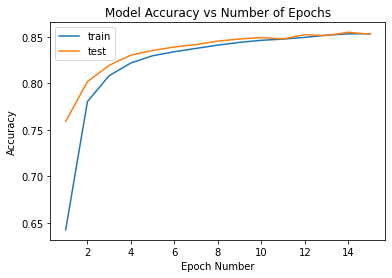

In [38]:
plt.plot(range(1,1+len(history.history['accuracy'])), history.history['accuracy'])
plt.plot(range(1,1+len(history.history['val_accuracy'])), history.history['val_accuracy'])
plt.title('Model Accuracy vs Number of Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Number')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [39]:
y_pred_class=model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_class.argmax(axis=1))


313/313 [==============================] - 1s 2ms/step


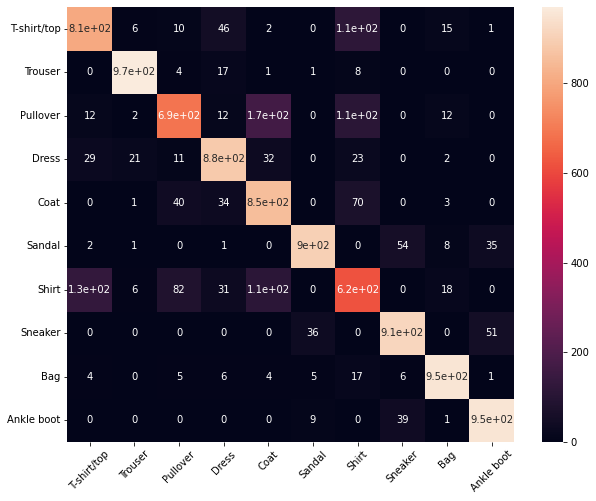

In [40]:
import seaborn as sn
fig,ax=plt.subplots(figsize=(10,8))
sn.heatmap(cm, annot=True)

ax.xaxis.set_ticklabels(label_dic.keys()); ax.yaxis.set_ticklabels(label_dic.keys());
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)

plt.show()